## Importing packages and the Dataset to do some EDA

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



df = pd.read_csv('data/kc_house_data.csv')
df_original = df.copy()
%store df_original

Stored 'df_original' (DataFrame)


## Viewing the Raw Data

In [133]:
df.head().iloc[:, 10:]

condition          grade  sqft_above sqft_basement  yr_built  yr_renovated  \
0    Average      7 Average        1180           0.0      1955           0.0   
1    Average      7 Average        2170         400.0      1951        1991.0   
2    Average  6 Low Average         770           0.0      1933           NaN   
3  Very Good      7 Average        1050         910.0      1965           0.0   
4    Average         8 Good        1680           0.0      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [134]:
df.head().iloc[:, :11]

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  condition  
0      5650     1.0        NaN  NONE    Average  
1      7242     2.0         NO  NONE    Average  
2     10000     1.0         NO  NONE    Average  
3      5000     1.0         NO  NONE  Very Good  
4      8080     1.0         NO  NONE    Average

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [136]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

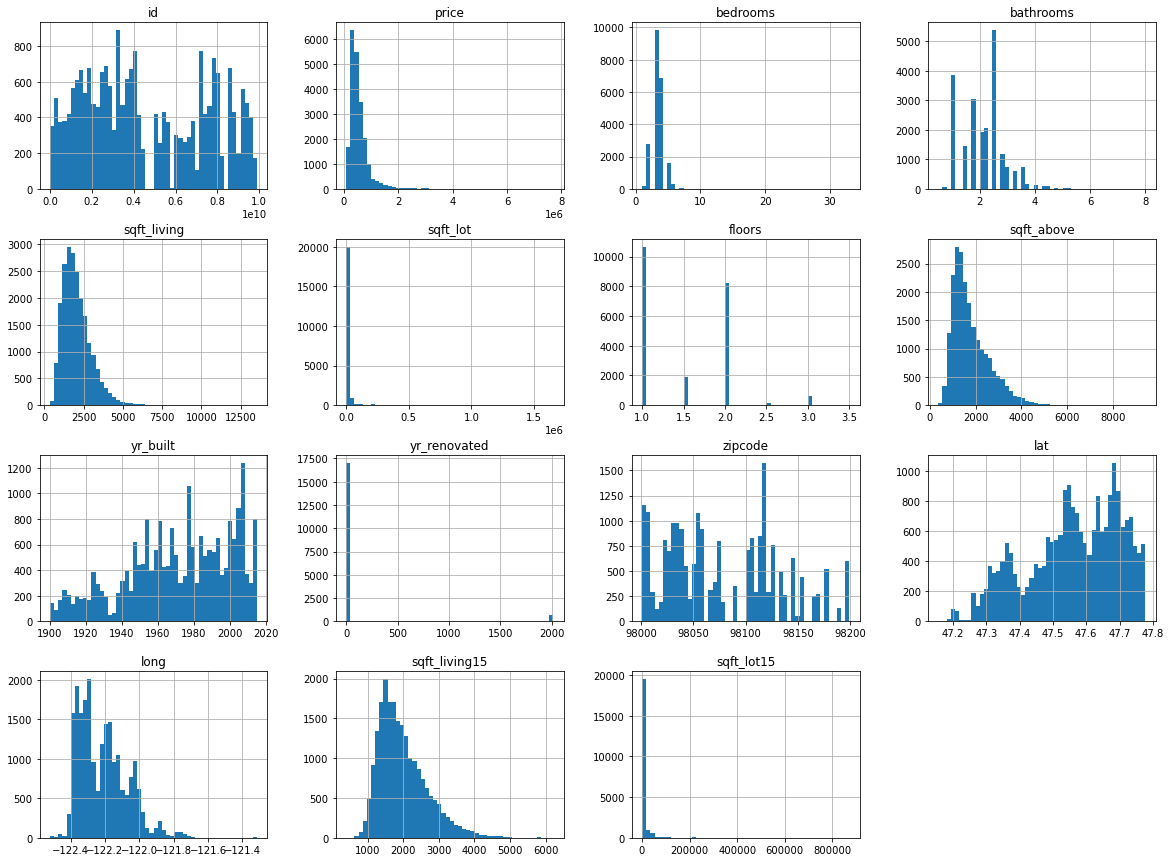

In [137]:
df.hist(bins=50, figsize=(20,15))
plt.show();

#### Initial Takeaways:
- I would like to add a datetime column for the dates, including year and month seperately.
- Waterfront and year renovated seem to be the only columns with NaN values.
- It seems that there is a lot of categorical columns: bedrooms, bathrooms, floors, waterfront, view, grade, condition. Dates and location info like yr_built, yr_renovated, lat, long, and zipcode are also non-continous values. 
- Some zero values might indicate something is non-existent, e.g. when sqft_basement or yr_renovated entry = 0.

### A look at 'Price': Descriptive Statistics
This will be our target variable

In [138]:
price = df['price']

In [139]:
len(price[price > 1000000]) 

1458

In [140]:
desc_stat_price = dict(price.describe())

In [141]:
desc_stat_price

{'count': 21597.0,
 'mean': 540296.5735055795,
 'std': 367368.1401013945,
 'min': 78000.0,
 '25%': 322000.0,
 '50%': 450000.0,
 '75%': 645000.0,
 'max': 7700000.0}

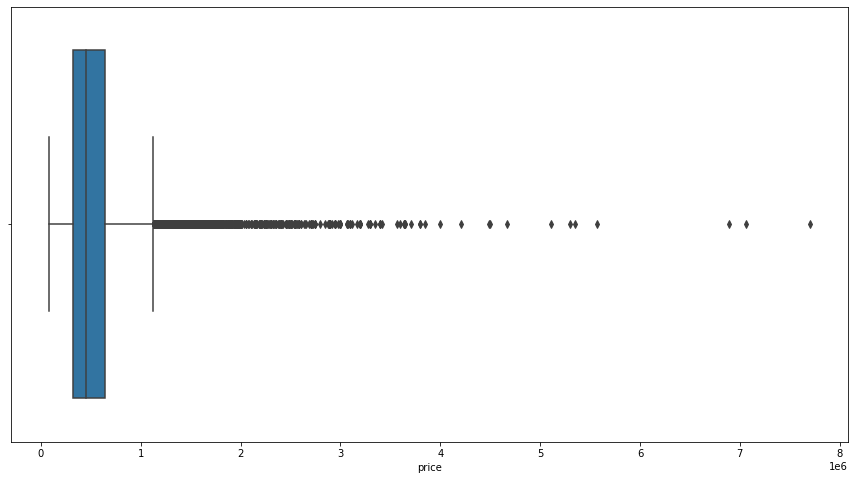

In [142]:
plt.figure(figsize = (15,8))
sns.boxplot(price);

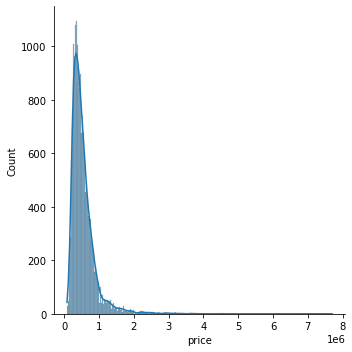

In [143]:
sns.displot(price, kde=True);

#### Takeaways from Price:
- Seems usual that the price would be skewed to the right, many outliers of vey expensive homes.
- Not normally disributed because of that fact. Might need to manipulate before running regression.
- We can assume that this 'price' column will be our dependent vairable in regression models.

## Clean some things up...

### Find NaN and 0 values

In [144]:
# of NaN in columns
def num_NaN(dataframe):
    column_lst = dataframe.columns.values.tolist()
    for column in column_lst:
        num_of_nan = len(df[df[column].isna() == True])
        percent_nan = round(num_of_nan / len(df[column]) * 100, 2)
        if num_of_nan > 0:
            print(f'# of NaN in the {column}: {num_of_nan}, {percent_nan}%')
    return

In [145]:
# of zeros in columns
def num_zeros(dataframe):
    column_lst = dataframe.columns.values.tolist()
    for column in column_lst:
        num_of_zeros = len(df[(df[column] == 0) | (df[column] == '0') | (df[column] == '0.0')])
        percent_zeros = round(num_of_zeros / len(df[column]) * 100)
        if num_of_zeros > 0:
            print(f'# of zeros in the {column}: {num_of_zeros}, {percent_zeros}%')
    return

In [146]:
num_NaN(df)

# of NaN in the waterfront: 2376, 11.0%
# of NaN in the view: 63, 0.29%
# of NaN in the yr_renovated: 3842, 17.79%


In [147]:
num_zeros(df)

# of zeros in the sqft_basement: 12826, 59%
# of zeros in the yr_renovated: 17011, 79%


In [148]:
# Data prep and cleaning

# Change to datetime and add month column
df['date'] = pd.to_datetime(df['date'])
df['month'] = pd.DatetimeIndex(df['date']).month

# Change waterfront missing value to No
df.loc[df.waterfront.isnull(), 'waterfront'] = "NO"

# Change view missing value to None
df.loc[df.view.isnull(), 'view'] = "NONE"

# Change condition to numerical value
cond_dict = {'Poor':0, 'Fair':1, 'Average':2, 'Good':3, 'Very Good':4}
df['condition'].replace(cond_dict, inplace=True)

# Change grade to numerical value
df['grade'] = df['grade'].map(lambda x: int(x.split(' ')[0]))

# Add has_basement column
df['basement'] = df['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)

# Change some yr_renovated missing value to 0 and add renovated column
df.loc[df.yr_renovated.isnull(), 'yr_renovated'] = 0
df['renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

# Add house_age column
df['age'] = df['date'].dt.year - df['yr_built']

In [149]:
# Drop columns
df.drop(columns=['id', 'yr_renovated', 'sqft_above', 'sqft_basement',
                      'yr_built', 'yr_renovated'], inplace=True)

In [150]:
# Loop through eeach column to find value counts
def df_value_counts(dataframe):
    for column in dataframe.columns:
        display(dataframe[column].value_counts())
    return

df_value_counts(df)

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-07-27      1
2015-03-08      1
2014-11-02      1
2015-05-15      1
2015-05-24      1
Name: date, Length: 372, dtype: int64

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

NO     21451
YES      146
Name: waterfront, dtype: int64

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

2    14020
3     5677
4     1701
1      170
0       29
Name: condition, dtype: int64

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

47.6846    17
47.5322    17
47.6624    17
47.5491    17
47.6886    16
           ..
47.3104     1
47.4681     1
47.2819     1
47.6096     1
47.4300     1
Name: lat, Length: 5033, dtype: int64

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.803      1
-121.711      1
-122.454      1
-121.835      1
-121.849      1
Name: long, Length: 751, dtype: int64

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: month, dtype: int64

1    21597
Name: basement, dtype: int64

0    20853
1      744
Name: renovated, dtype: int64

 9      472
 8      443
 11     431
 0      430
 10     428
       ... 
 113     28
 115     26
 81      23
 80      21
-1       12
Name: age, Length: 117, dtype: int64

## Review of our cleaning

In [151]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

  waterfront  view  condition  grade  zipcode      lat     long  \
0         NO  NONE          2      7    98178  47.5112 -122.257   
1         NO  NONE          2      7    98125  47.7210 -122.319   
2         NO  NONE          2      6    98028  47.7379 -122.233   
3         NO  NONE          4      7    98136  47.5208 -122.393   
4         NO  NONE          2      8    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  month  basement  renovated  age  
0           1340        5650     10         1          0   59  
1           1690        7639     12         1          1   63  
2           2720        8062      2         1          0   82  
3           1360        5000     12         1          0   49  
4           1800        7503      2         1          0   28

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  object        
 8   view           21597 non-null  object        
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  zipcode        21597 non-null  int64         
 12  lat            21597 non-null  float64       
 13  long           21597 non-null  float64       
 14  sqft_living15  21597 non-null  int64         
 15  sqft_lot15     2159

## Storing clean data

In [153]:
df_clean = df.copy()

In [154]:
%store df_clean

Stored 'df_clean' (DataFrame)


#### What happened:
- Changed date column to date-time object
- Added a month column
- Changed zero values on 'sqft_basement' and 'yr_renovated' to NaN
- Inspeceted on NaN values in 'view' and 'waterfront'

## Correlations Explorations :)

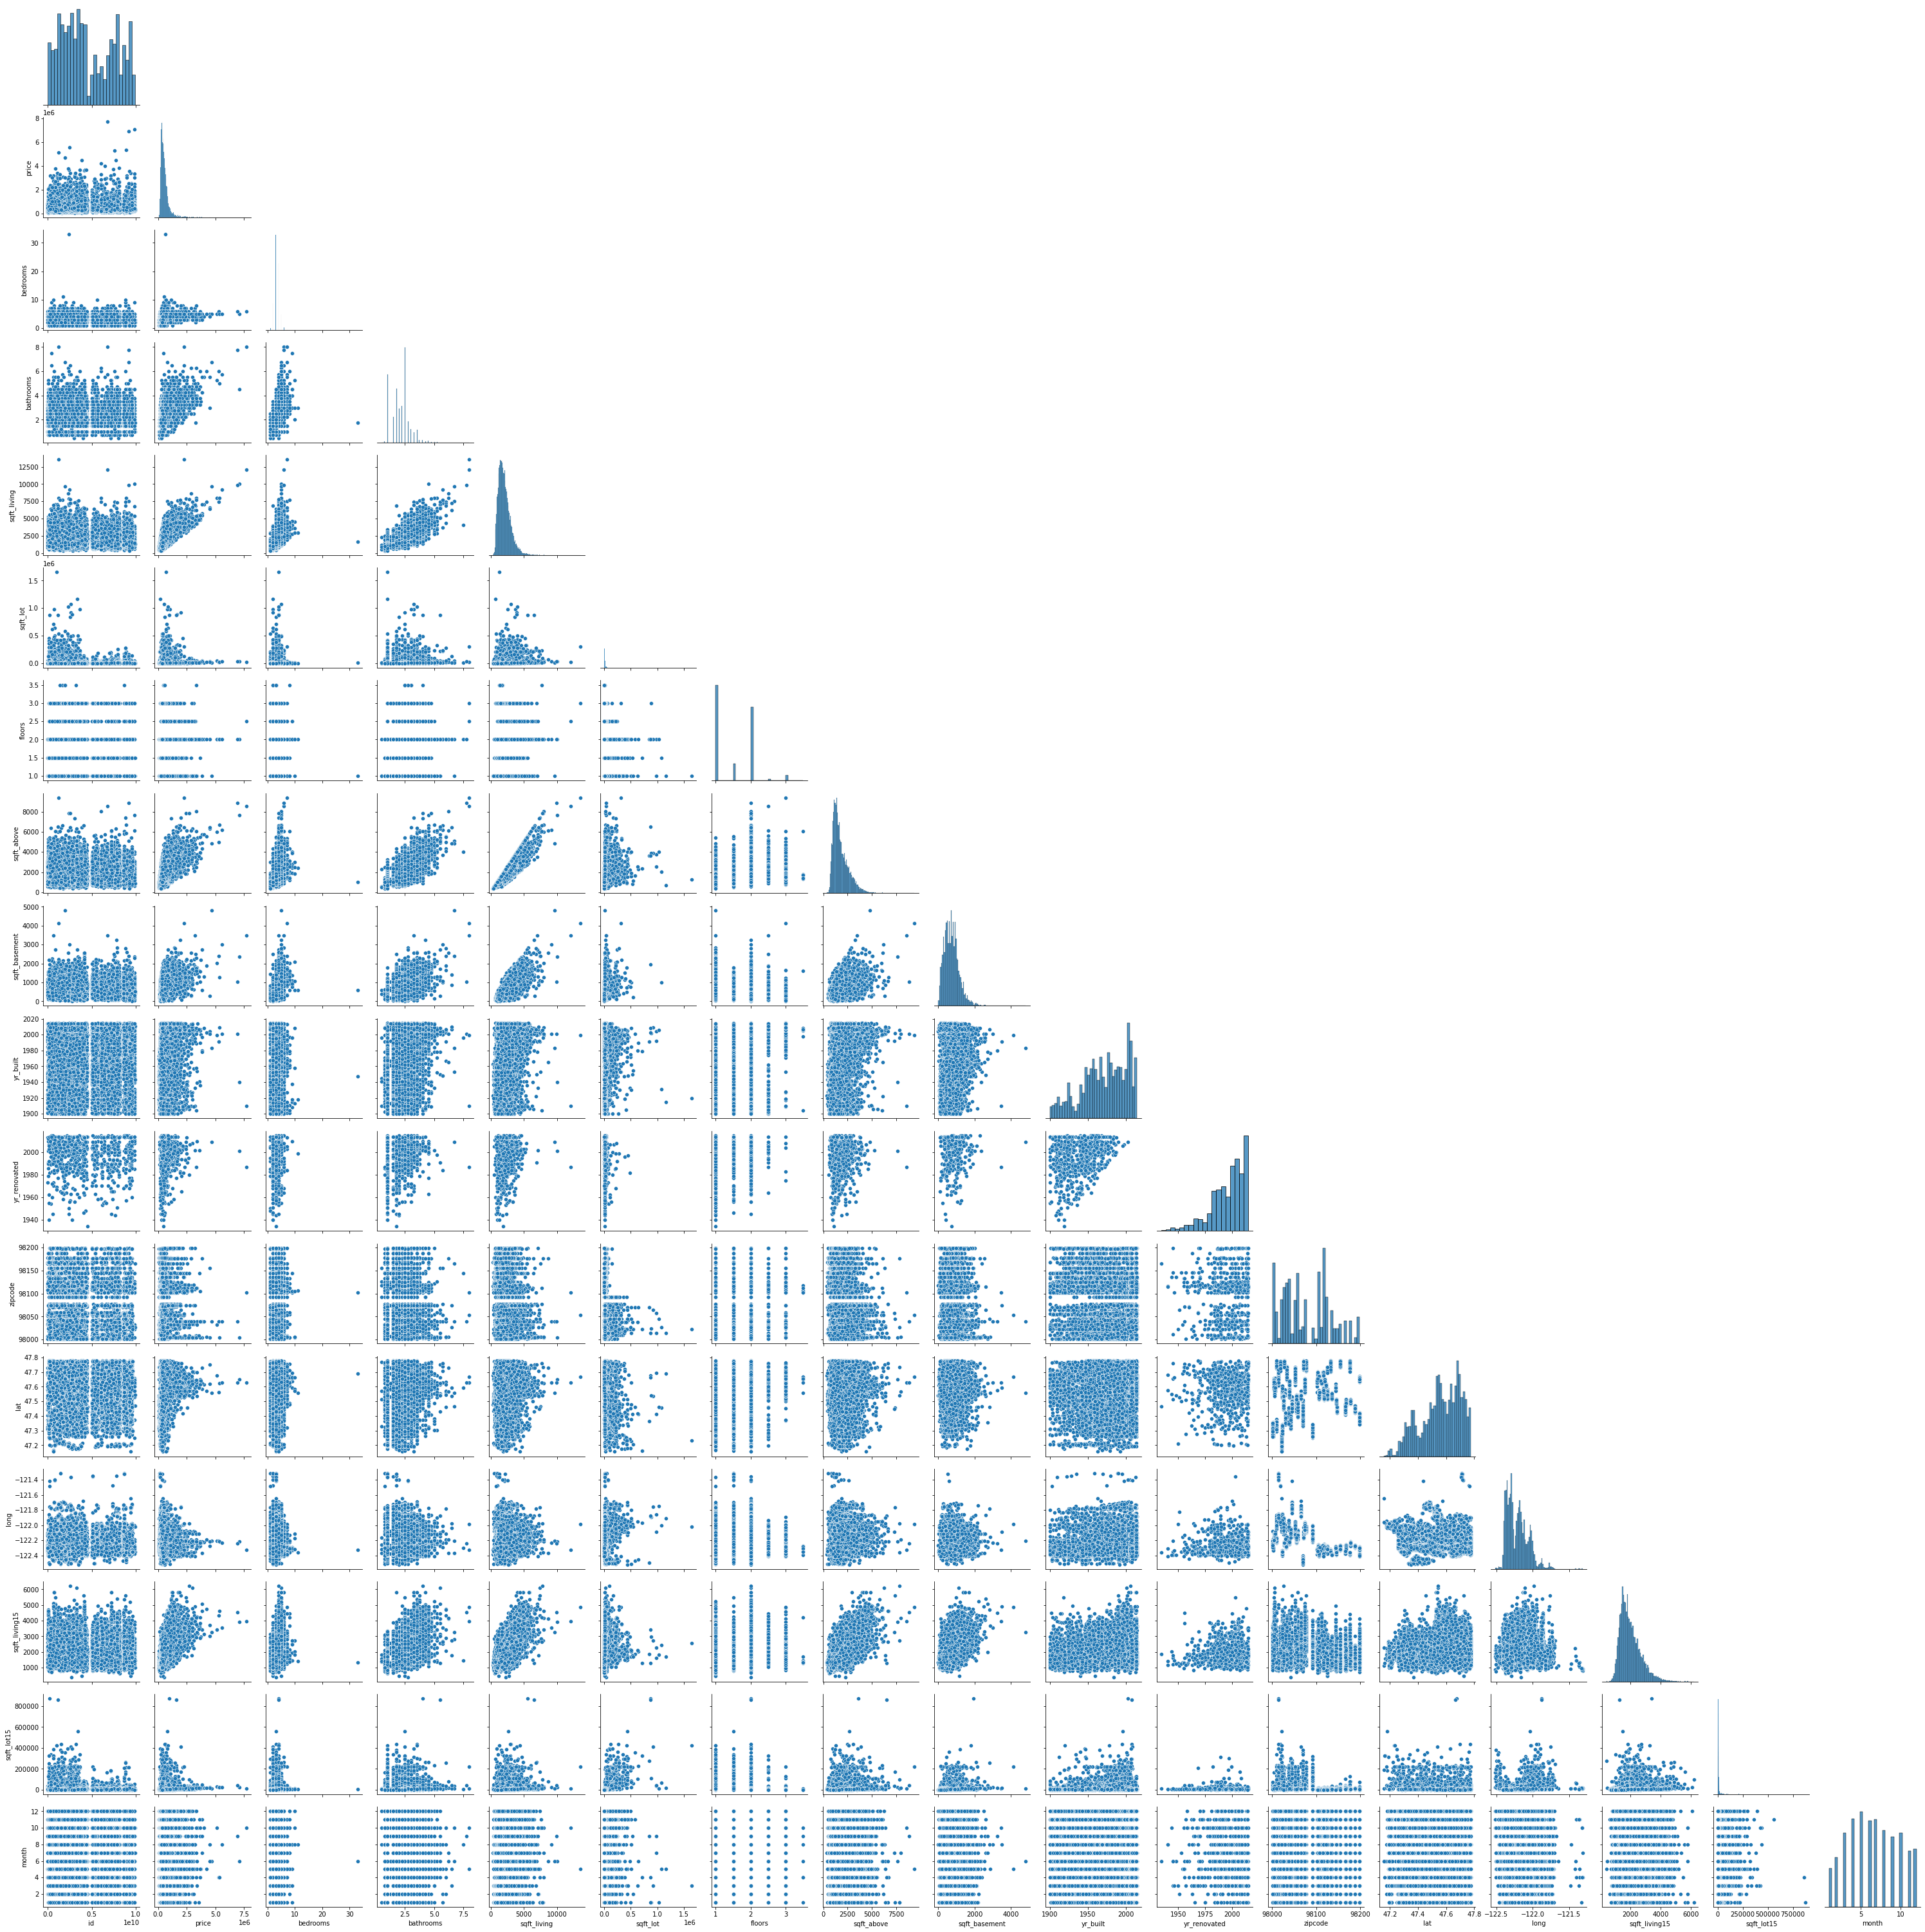

In [120]:
sns.pairplot(data=df_clean, corner=True);

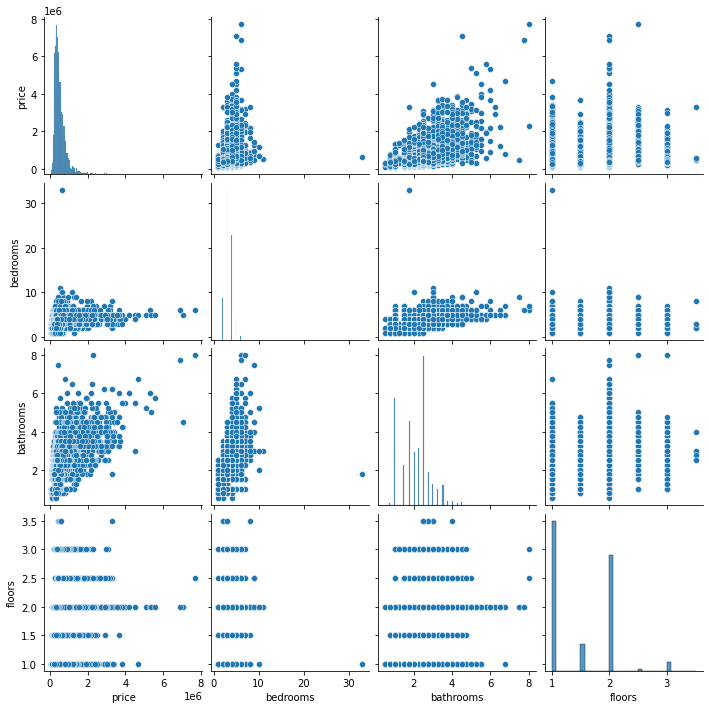

In [121]:
sns.pairplot(data=df_clean, vars=['price', 'bedrooms', 'bathrooms', 'floors']);


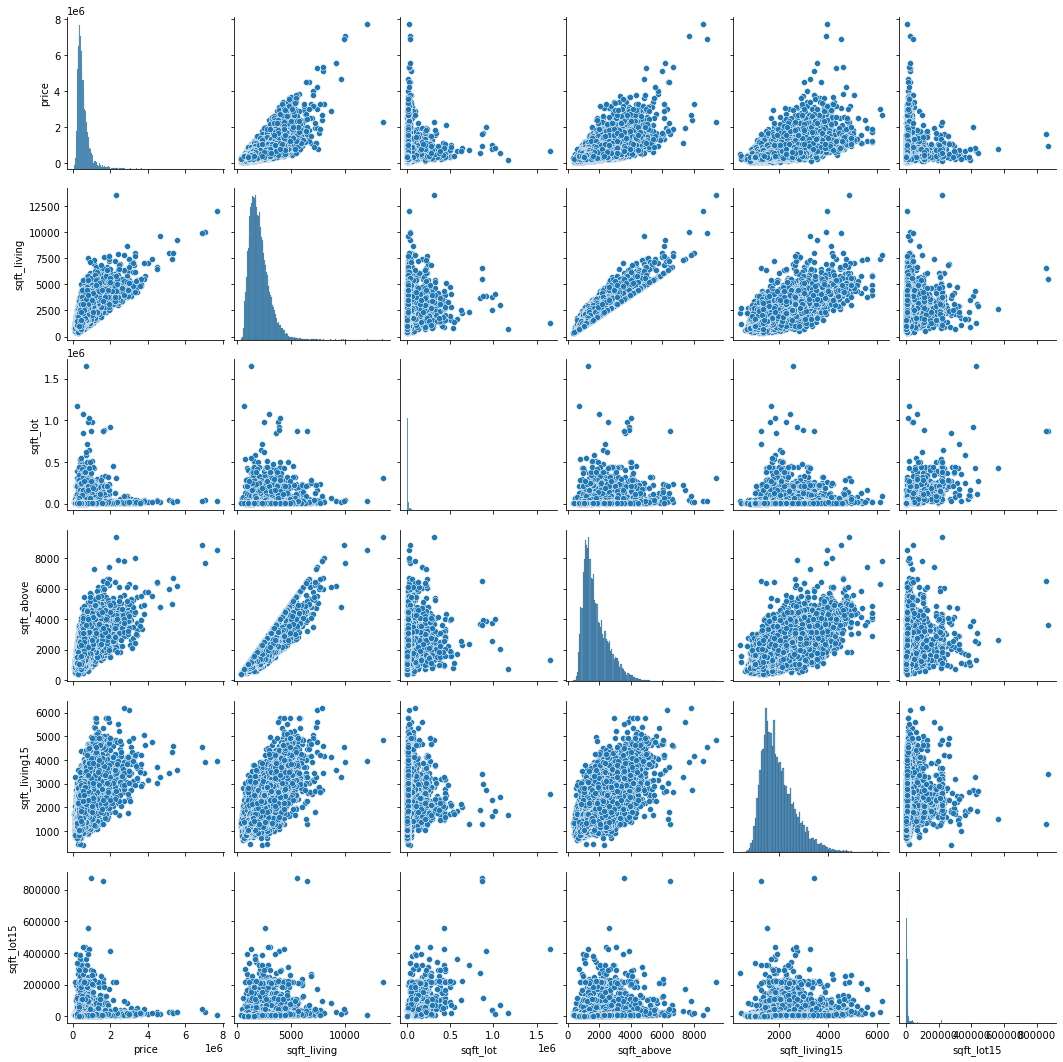

In [33]:
sns.pairplot(data=df, vars=['price','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']);

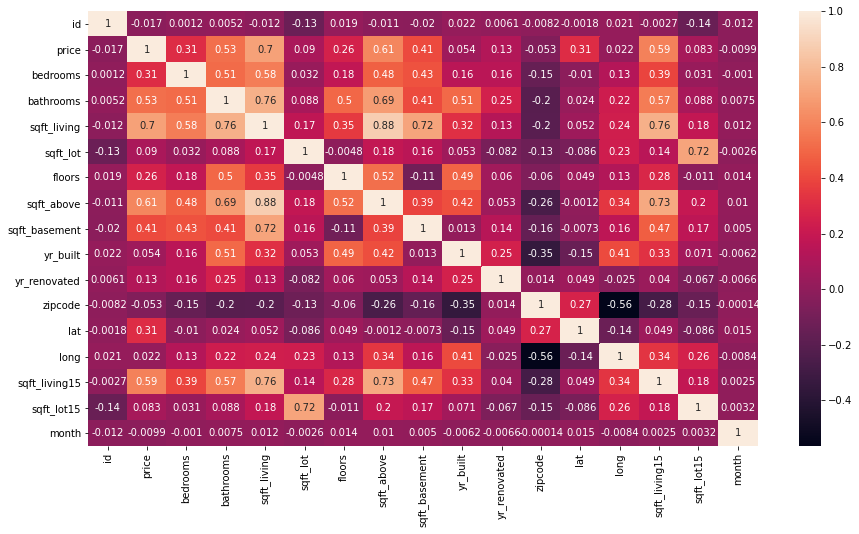

In [122]:
plt.figure(figsize = (15,8))
sns.heatmap(df_clean.corr(),annot=True);

In [123]:
abs(df_clean.corr()) > .70

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id              True  False     False      False        False     False   
price          False   True     False      False         True     False   
bedrooms       False  False      True      False        False     False   
bathrooms      False  False     False       True         True     False   
sqft_living    False   True     False       True         True     False   
sqft_lot       False  False     False      False        False      True   
floors         False  False     False      False        False     False   
sqft_above     False  False     False      False         True     False   
sqft_basement  False  False     False      False         True     False   
yr_built       False  False     False      False        False     False   
yr_renovated   False  False     False      False        False     False   
zipcode        False  False     False      False        False     False   
lat            False  False     False      False        False     False   
long           False  False     False      False        False     False   
sqft_living15  False  False     False      False         True     False   
sqft_lot15     False  False     False      False        False      True   
month          False  False     False      False        False     False   

               floors  sqft_above  sqft_basement  yr_built  yr_renovated  \
id              False       False          False     False         False   
price           False       False          False     False         False   
bedrooms        False       False          False     False         False   
bathrooms       False       False          False     False         False   
sqft_living     False        True           True     False         False   
sqft_lot        False       False          False     False         False   
floors           True       False          False     False         False   
sqft_above      False        True          False     False         False   
sqft_basement   False       False           True     False         False   
yr_built        False       False          False      True         False   
yr_renovated    False       False          False     False          True   
zipcode         False       False          False     False         False   
lat             False       False          False     False         False   
long            False       False          False     False         False   
sqft_living15   False        True          False     False         False   
sqft_lot15      False       False          False     False         False   
month           False       False          False     False         False   

               zipcode    lat   long  sqft_living15  sqft_lot15  month  
id               False  False  False          False       False  False  
price            False  False  False          False       False  False  
bedrooms         False  False  False          False       False  False  
bathrooms        False  False  False          False       False  False  
sqft_living      False  False  False           True       False  False  
sqft_lot         False  False  False          False        True  False  
floors           False  False  False          False       False  False  
sqft_above       False  False  False           True       False  False  
sqft_basement    False  False  False          False       False  False  
yr_built         False  False  False          False       False  False  
yr_renovated     False  False  False          False       False  False  
zipcode           True  False  False          False       False  False  
lat              False   True  False          False       False  False  
long             False  False   True          False       False  False  
sqft_living15    False  False  False           True       False  False  
sqft_lot15       False  False  False          False        True  False  
month            False  False  False          False      

In [128]:
# def scatter_iter(dataframe, y_value):
#     for column in dataframe:
#         dataframe.plot(kind='scatter', x=column, y=y_value)
#     return 
# scatter_iter(df_clean, 'price')

## Simple Linear Regression Model

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [40]:
X = df['sqft_living']
y = df['price']
simple_model = sm.OLS(y, sm.add_constant(X)).fit()

In [41]:
simple_model_summary = simple_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 03 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:40:29   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
X = df['sqft_living15']
y = df['price']
simple_model = sm.OLS(y, sm.add_constant(X)).fit()

In [43]:
simple_model_summary = simple_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.125e+04
Date:                Mon, 03 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:40:29   Log-Likelihood:            -3.0286e+05
No. Observations:               21597   AIC:                         6.057e+05
Df Residuals:                   21595   BIC:                         6.057e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.303e+04   6216.659    -13.356      0.000   -9.52e+04   -7.08e+04
sqft_living15   313.7615      2.958    106.064      0.000     307.963     319.560
==============================================================================
Omnibus:                    20143.282   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1910578.895
Skew:                           4.207   Prob(JB):                         0.00
Kurtosis:                      48.303   Cond. No.                     6.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Takeaway:
- The strongest correlations to price still have a low R-squared value with 'price' as dependent variable in simple linear regression model.
- These models don't do justice given the price variable is not normally distributed. 


## Goals for next session:
- Domain research: figure out what the variables really mean, e.g. sqft_living vs. sqft_living15
- Make adjustments to follow L.I.N.H. assumptions
- Run a multiple regression and find best way to introduce categorical variables to the model.

## Multicollinearity Search 

In [44]:
# going to remove the dependent varibale 'price' to explore predictors. 
# Also removing 'id' and and 'date'but will keep 'month' and all other variables.
df_pred = df.iloc[:,3:]
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     19221 non-null  object 
 6   view           21534 non-null  object 
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  8317 non-null   float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   744 non-null    float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  month 

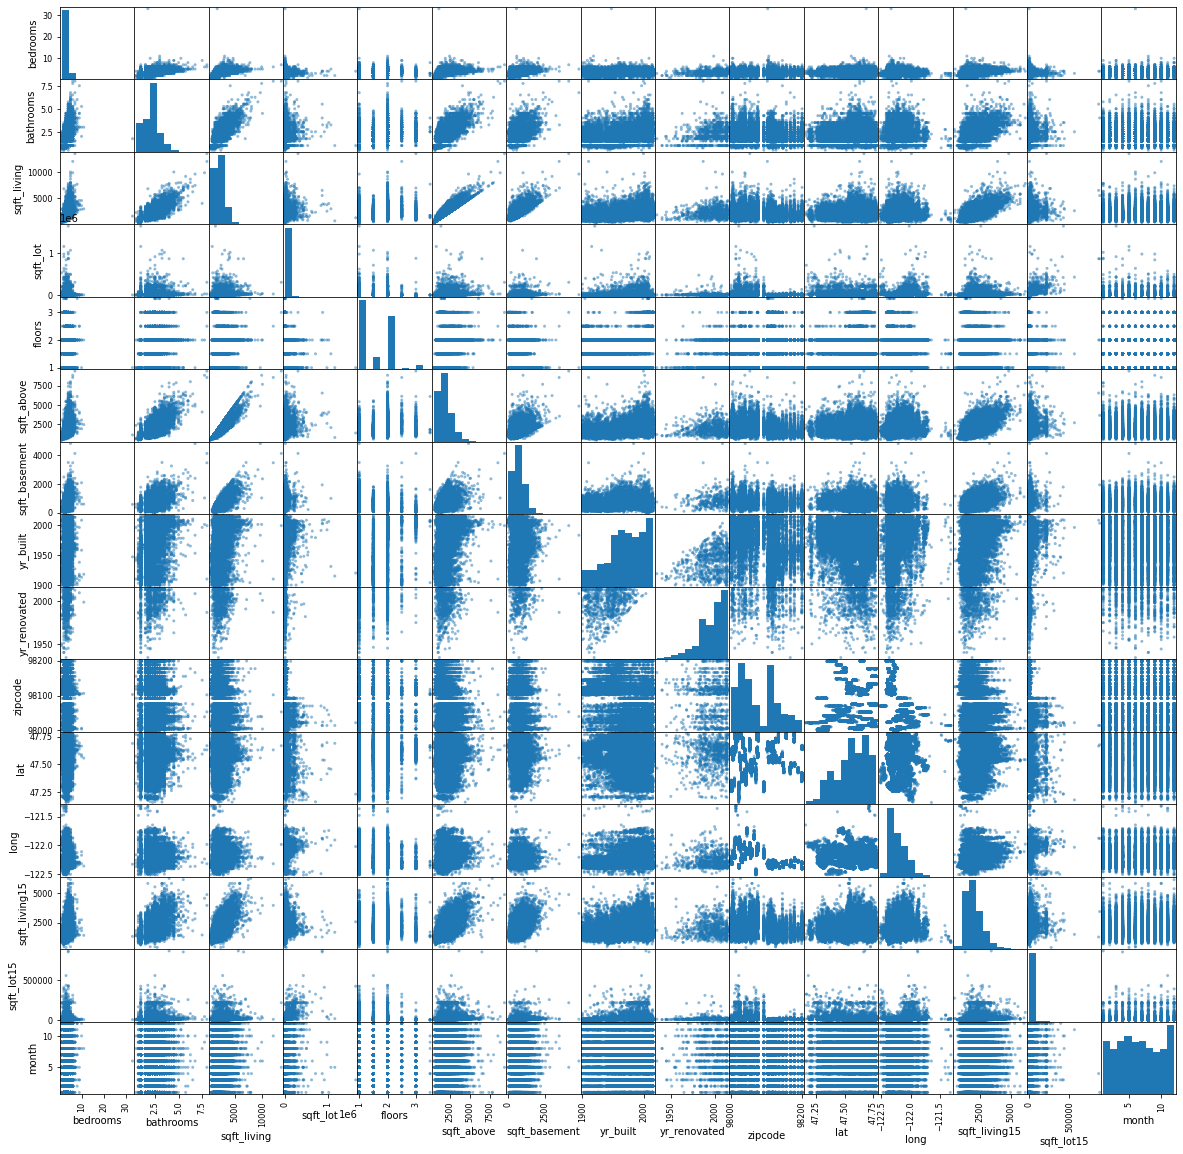

In [45]:
pd.plotting.scatter_matrix(df_pred, figsize=[20, 20]);
plt.show()

In [46]:
abs(df_pred.corr()) > 0.75

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
bedrooms           True      False        False     False   False       False   
bathrooms         False       True         True     False   False       False   
sqft_living       False       True         True     False   False        True   
sqft_lot          False      False        False      True   False       False   
floors            False      False        False     False    True       False   
sqft_above        False      False         True     False   False        True   
sqft_basement     False      False        False     False   False       False   
yr_built          False      False        False     False   False       False   
yr_renovated      False      False        False     False   False       False   
zipcode           False      False        False     False   False       False   
lat               False      False        False     False   False       False   
long              False      False        False     False   False       False   
sqft_living15     False      False         True     False   False       False   
sqft_lot15        False      False        False     False   False       False   
month             False      False        False     False   False       False   

               sqft_basement  yr_built  yr_renovated  zipcode    lat   long  \
bedrooms               False     False         False    False  False  False   
bathrooms              False     False         False    False  False  False   
sqft_living            False     False         False    False  False  False   
sqft_lot               False     False         False    False  False  False   
floors                 False     False         False    False  False  False   
sqft_above             False     False         False    False  False  False   
sqft_basement           True     False         False    False  False  False   
yr_built               False      True         False    False  False  False   
yr_renovated           False     False          True    False  False  False   
zipcode                False     False         False     True  False  False   
lat                    False     False         False    False   True  False   
long                   False     False         False    False  False   True   
sqft_living15          False     False         False    False  False  False   
sqft_lot15             False     False         False    False  False  False   
month                  False     False         False    False  False  False   

               sqft_living15  sqft_lot15  month  
bedrooms               False       False  False  
bathrooms              False       False  False  
sqft_living             True       False  False  
sqft_lot               False       False  False  
floors                 False       False  False  
sqft_above             False       False  False  
sqft_basement          False       False  False  
yr_built               False       False  False  
yr_renovated           False       False  False  
zipcode                False       False  False  
lat                    False       False  False  
long                   False       False  False  
sqft_living15           True       False  False  
sqft_lot15             False        True  False  
month                  False       False   True

In [60]:
def df_corr_pairs(dataframe, percentage):
        '''Enter a dataframe e and the percentage correlation threshhold
            Returns a DF of the high correlated pairs '''
    percentage = percentage / 100
    
    df_corr_pairs = dataframe.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df_corr_pairs['pairs'] = list(zip(df_corr_pairs.level_0, df_corr_pairs.level_1))
    df_corr_pairs.set_index(['pairs'], inplace = True)
    df_corr_pairs.drop(columns=['level_1', 'level_0'], inplace = True)
    df_corr_pairs.columns = ['cc']
    df_corr_pairs = df_corr_pairs.drop_duplicates()
    df_high_corr_pairs = df_corr_pairs[(df_corr_pairs['cc'] > percentage) & (df_corr_pairs['cc'] < 1)]
    return df_high_corr_pairs

In [130]:
df_corr_pairs(df_pred, 65)

cc
pairs                                 
(sqft_living, sqft_above)     0.876448
(sqft_living15, sqft_living)  0.756402
(bathrooms, sqft_living)      0.755758
(sqft_living15, sqft_above)   0.731767
(sqft_lot15, sqft_lot)        0.718204
(sqft_basement, sqft_living)  0.716030
(bathrooms, sqft_above)       0.686668

In [131]:
df_corr_pairs(df_clean, 65)

cc
pairs                                 
(sqft_living, sqft_above)     0.876448
(sqft_living15, sqft_living)  0.756402
(bathrooms, sqft_living)      0.755758
(sqft_living15, sqft_above)   0.731767
(sqft_lot15, sqft_lot)        0.718204
(sqft_basement, sqft_living)  0.716030
(price, sqft_living)          0.701917
(sqft_above, bathrooms)       0.686668

In [54]:
df_high_corr_pairs

cc
pairs                                 
(sqft_living, sqft_above)     0.876448
(sqft_living15, sqft_living)  0.756402
(bathrooms, sqft_living)      0.755758
(sqft_living15, sqft_above)   0.731767
(sqft_lot15, sqft_lot)        0.718204
(sqft_basement, sqft_living)  0.716030

In [ ]:
# it seems we will need to get rid of a lot of variables here.

# Will need to choose one measure of sqft amoung the types: sqft_living, sqft_living15, sqft_above, sqft_basement

# Will have to take a closer look at bathrooms since the are not technically continous 
#     altough they follow a numeric order.

# sqft_lot and sqft_lot15 are correlated to each other but not to any of the other sqft measures, 
#     so we can likely choose one of these measure for our model.

## Try a multi regression model

In [ ]:
f = 'price ~ sqft_living + sqft_lot'
multi_model = ols(formula=f, data=df).fit()
multi_model_summ = multi_model.summary()
multi_model_summ

In [ ]:
# This barely improved the model, and actually made the condition number worse. Might need to look at something else.